# Retke matrice

Podsetimo se da su retke matrice (engl. sparse matrix) matrice u kojima je *veliki broj* elementa jednak nuli. 
![retke matrice](assets/sparse_matrix.png)
Zahvaljujući ovoj svojoj osobini za njihovo čuvanje je potrebno manje memorije, a operacije nad njima se mogu izvoditi efikasnije. Ova sveska sumira osnovne formate retkih matrica i neke principe rada sa njima.

Matrice koje nisu retke zovemo gustim matricama (engl. dense matrix).

In [1]:
import numpy as np
np.random.seed(7)

In [2]:
from matplotlib import pyplot as plt 

Rad sa retkim matricama podržan je paketom `sparse` biblioteke `scipy`.

In [3]:
from scipy import sparse

Osnovni formati za zapis retkih matrica su: `CSC` (Compressed Sparse Column), `CSR` (Compressed Sparse Row), `COO` (COOrdinate format), `DOK` (Dictionary of Keys), `DIA` (DIAgonal format), `LiL` (List of Lists) i `BSR` (Block Compressed Row). Nadalje ćemo upoznati neke najčešće korišćene.

U `COO` formatu matrice se čuvaju kao trojke indeksa vrsta, indeksa kolona i vrednosti elementa različitih od nule. <img src='assets/coo_format.gif' style='width:600px'>

Ove matrice kreiramo korišćenjem funkcije `coo_matrix`.

In [4]:
row = [1, 3, 0, 2, 4]
column = [1, 4, 2, 3, 3]
data = [2, 5, 9, 1, 6]

In [5]:
coo = sparse.coo_matrix((data, (row, column)), shape=(6, 7))

In [6]:
print(coo)

  (1, 1)	2
  (3, 4)	5
  (0, 2)	9
  (2, 3)	1
  (4, 3)	6


In [7]:
coo.toarray()

array([[0, 0, 9, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0],
       [0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

Ukoliko je dostupna matrica u COO formatu, preko svojstava `row`, `col` i `data` se mogu očitati vrednosti karakterističnih nizova.

In [8]:
coo.row

array([1, 3, 0, 2, 4], dtype=int32)

In [9]:
coo.col

array([1, 4, 2, 3, 3], dtype=int32)

In [10]:
coo.data

array([2, 5, 9, 1, 6])

U `CSR` formatu čuvaju se indeksi vrsta, indeksi kolona i vrednosti elemenata različitih od nule ali sa idejom da se dodatno optimizuju operacije nad njima. Za svaka dva susedna elementa u indeksu vrsta prvi broj označava indeks vrste u kojoj se nalaze ne-nula elementi, a drugi je izračunat tako da njihova razlika predstavlja broj ne-nula elemenata u vrsti. U indeksu kolona popisane su za svaku vrstu uzastopno indeksi kolona u kojima se nalaze ne-nula elementi. Niz sa vrednostima elemenata sadrži same elemente. Sledeća animacija približava ovaj (možda malo konfuzan) opis. <img src='assets/csr_format.gif' style='width:600px'>

Ovakve matrice konstruišu se pozivom funkcije `csr_matrix` nad argumentima koji, redom, predstavljaju ne-nula elemenate matrice, indekse njihovih kolona i indekse njihovih vrsta u prethodno opisanom formatu. Alternativni način kreiranja je korišćenjem trojki koje sadrže vrednosti i parove njihovih indeksa. 

In [11]:
index_pointers = np.array([0, 2, 3, 3, 3, 6, 6, 7])
indices = np.array([0, 2, 2, 2, 3, 4, 3])
data = np.array([8, 2, 5, 7, 1, 2, 9])

In [12]:
csr = sparse.csr_matrix((data, indices, index_pointers))

In [13]:
print(csr)

  (0, 0)	8
  (0, 2)	2
  (1, 2)	5
  (4, 2)	7
  (4, 3)	1
  (4, 4)	2
  (6, 3)	9


In [14]:
csr.toarray()

array([[8, 0, 2, 0, 0],
       [0, 0, 5, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 7, 1, 2],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 9, 0]])

Ukoliko je dostupna matrica u CSR formatu, preko svojstava `indptr`, `indices` i `data` se mogu očitati vrednosti korišćene za konstrukciju matrice.

In [15]:
csr.indptr

array([0, 2, 3, 3, 3, 6, 6, 7], dtype=int32)

In [16]:
csr.indices

array([0, 2, 2, 2, 3, 4, 3], dtype=int32)

In [17]:
csr.data

array([8, 2, 5, 7, 1, 2, 9])

`CSC` format predstavlja ekvivalent prethodnog formata ali sa specifično zapisanim indeksom kolona. <img src='assets/csc_format.gif' style='width:600px'>

Ovakve matrice konstruišu se pozivom funkcije `csc_matrix` na argumentima koji, redom, predstavljaju ne-nula elemenate matrice, indekse njihovih vrsta i indekse njihovih kolona.

In [18]:
index_pointers = np.array([0, 1, 1, 4, 6, 7])
indices = np.array([0, 0, 1, 4, 4, 6, 4]) 
data = np.array([8, 2, 5, 7, 1, 9, 2])                       

In [19]:
csc = sparse.csc_matrix((data, indices, index_pointers))

In [20]:
print(csc)

  (0, 0)	8
  (0, 2)	2
  (1, 2)	5
  (4, 2)	7
  (4, 3)	1
  (6, 3)	9
  (4, 4)	2


In [21]:
csc.toarray()

array([[8, 0, 2, 0, 0],
       [0, 0, 5, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 7, 1, 2],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 9, 0]])

Format `DIA` je specijalizovan za čuvanje retkih dijagonalnih matrica. <img src='assets/dia_format.gif' style='width:600px'>

Za kreiranje matrica u ovom formatu koristi se funkcija `dia_matrix`. Njeni argumenti su matrica vrednosti elemenata koji se nalaza na dijagonalama paralelnim glavnoj dijagonali i niz pomeraja (ofseta) koji ukazuju na poziciju dijagonale. Pozitivne vrednosti pomeraja se odnose na dijagonale iznad glavne, a negativne na dijagonale ispod nje. Neke vrednosti u matrici podataka su višak i mogu imati proizvoljnu vrednosti.

In [22]:
data = np.arange(0, 15).reshape(3, 5) + 1
offsets = np.array([0, -3, 2])

In [23]:
dia = sparse.dia_matrix((data, offsets), shape=(7, 5))

In [24]:
dia.toarray()

array([[ 1,  0, 13,  0,  0],
       [ 0,  2,  0, 14,  0],
       [ 0,  0,  3,  0, 15],
       [ 6,  0,  0,  4,  0],
       [ 0,  7,  0,  0,  5],
       [ 0,  0,  8,  0,  0],
       [ 0,  0,  0,  9,  0]])

Biblioteka podržava konverzije iz jednog formata zapisa u drugi format. Mogu se koristiti funkcije koje smo pomenuli, ali i funkcije `tocoo`, `tocsc`, `tocsr`, ...

In [25]:
sparse.csc_matrix(coo).toarray()

array([[0, 0, 9, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0],
       [0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [26]:
coo.tocsc().toarray()

array([[0, 0, 9, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0],
       [0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

Kao što smo videli u primerima, gusta reprezentacija retkih matrica se može dobiti pozivima `toarray` ili `todense` metoda. Prva metoda vraća matricu koja je tipa `ndarray`, a druga matricu koja je tipa `matrix`. Tip `matrix` se razlikuje od `ndarray` niza po specifičnostima nekih operacija, na primer A\*B predstavlja matrično, a ne pokoordinatno množenje. Preporučuje se korišćenje `toarray` metode.

Ukoliko je od postojeće guste matrice potrebno kreirati retku matricu, mogu se iskoristiti funkcije `coo_matrix`, `csr_matrix` i `csc_matrix` i njima slične.

In [27]:
array = np.array([
    [ 1,  0, 13,  0,  0],
    [ 0,  2,  0, 14,  0],
    [ 0,  0,  3,  0, 15],
    [ 6,  0,  0,  4,  0],
    [ 0,  7,  0,  0,  5],
    [ 0,  0,  8,  0,  0],
    [ 0,  0,  0,  9,  0]])

In [28]:
sparse_array = sparse.csc_matrix(array)

In [29]:
sparse_array.data

array([ 1,  6,  2,  7, 13,  3,  8, 14,  4,  9, 15,  5])

Proizvoljne retke matrice se mogu generisati pozivom funkcije `random` koja očekuje informacije o dimenziji matrice i gustini matice. Gustina matrice je realan broj u intervalu [0, 1] gde vrednost 0 predstavlja matricu nula, a 1 sasvim gustu matricu (bez nula vrednosti). Alternativno, može se koristiti i funkcija `rand` koja bira vrednosti iz uniformne raspodele. Podrazumevani format matrica je COO, a može se promeniti navođenjem parametra `format`.

In [30]:
A = sparse.random(m=7, n=5, density=0.4)
A.toarray()

array([[0.        , 0.        , 0.        , 0.38464957, 0.        ],
       [0.79076351, 0.        , 0.35747524, 0.95124834, 0.        ],
       [0.85129459, 0.93762934, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.34875638, 0.        , 0.61370347],
       [0.        , 0.27651471, 0.17405276, 0.        , 0.4826369 ],
       [0.10047397, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.4488258 , 0.        , 0.19335562, 0.        ]])

Broj ne-nula (engl. non-zero) elemenata retke matrice se može dobiti svojstvom `nnz` ili pozivom funkcije `count_nonzero`, a sami indeksi elemenata pozivom funkcije `nonzero`.

In [31]:
A.nnz

14

In [32]:
A.count_nonzero()

14

In [33]:
A.nonzero()

(array([1, 2, 5, 2, 4, 6, 1, 3, 4, 0, 1, 6, 3, 4], dtype=int32),
 array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4], dtype=int32))

Na osnovu broja ne-nula vrednosti se može izraćunati koeficijent retkosti matrice po formuli $1 - \frac{broj\ ne-nula\ elemenata\ matrice}{ukupan\ broj\ elemenata\ matrice}$.

In [34]:
A.shape

(7, 5)

In [35]:
sparsity = 1.0 - A.count_nonzero() / (A.shape[0] * A.shape[1])

In [36]:
sparsity

0.6

Za vizuelizaciju retkih matrica može se iskoristiti funkcija `spy` biblioteke `matplotlib`. Ova funkcija prikazuje samo vrednosti različite od nule na odgovarajućoj 2D mreži čije dimenzije odgovaraju dimenziji matrice pa se uz brojčane vrednosti može steći utisak o strukturi matrice. 

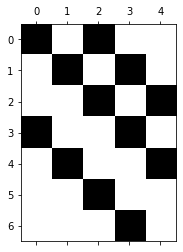

In [37]:
plt.spy(array)
plt.show()

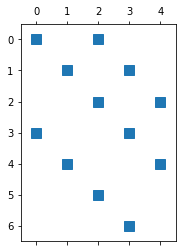

In [38]:
plt.spy(sparse_array)
plt.show()

Uporedimo razlike u veličinama gustih i retkih matrica. Skup podataka sa kojim ćemo eksperimentisati će biti uzorkovan iz binomne raspodele sa verovatnoćom uspeha 0.1 i biće dimenzija 2000x10000.  

In [39]:
dense_dataset = np.random.binomial(1, 0.1, 20000000).reshape(2000,10000)  
sparse_dataset = sparse.csr_matrix(dense_dataset)

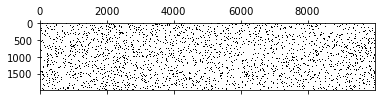

In [40]:
plt.spy(dense_dataset)

Memorijska veličina nizova se može dobiti svojstvom `nbytes`. Mi ćemo je računati izraženu u megabajtima. 

In [41]:
dense_dataset_size = dense_dataset.nbytes/1e6
sparse_dataset_size = (sparse_dataset.data.nbytes + sparse_dataset.indptr.nbytes + sparse_dataset.indices.nbytes)/1e6

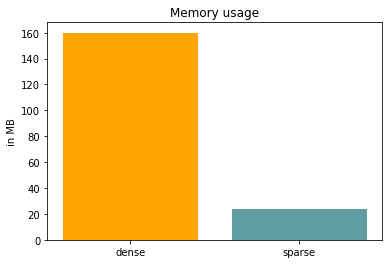

In [42]:
plt.ylabel('in MB')
plt.title('Memory usage')
plt.bar(['dense', 'sparse'], [dense_dataset_size, sparse_dataset_size], color=['orange', 'cadetblue'])
plt.show()

Uporedimo sada i vremensku dimenziju rada sa gustim i retkim matricama. Matrice su istih oblika (imaju istu vrednost `shape` svojstva, ali imaju različite veličine tj. različit broj elemenata koji možemo da pročitamo svojstvom `size`).

In [43]:
dense_dataset.shape

(2000, 10000)

In [44]:
dense_dataset.size

20000000

In [45]:
sparse_dataset.shape

(2000, 10000)

In [46]:
sparse_dataset.size

2002417

Koristićemo paket `time` za merenje vremena potrebnog za izvršavanje algebarskih operacija. Pratićemo izračunavanje proizvoda $MM^T$ zadate matrice $M$.

In [47]:
from time import time

In [48]:
def print_time(M):
    start = time()
    result = np.dot(M, M.T)
    end = time()
    
    print('Time (in seconds): ', end - start)

In [49]:
print_time(dense_dataset)

Time (in seconds):  39.980648040771484


In [50]:
print_time(sparse_dataset)

Time (in seconds):  1.682831048965454


Pojedinačnim elementima retkih matrica se **ne** može pristupiti na uobičajen način za sve formate. Na primer, `coo` format ne dozvoljava indeksiranje, dok `csr` format dozvoljava.

In [51]:
sparse_matrix = sparse.random(m=5, n=5, density=0.4, format='coo')

In [52]:
sparse_matrix[1, 1]

TypeError: 'coo_matrix' object is not subscriptable

In [53]:
sparse_matrix = sparse.random(m=5, n=5, density=0.4, format='csr')

In [54]:
sparse_matrix[1, 1]

0.293857765691545

Uvek se mogu pročitati vrste ili kolone retkih matrica, ali će i one biti retki nizovi (matrice) sami po sebi. 

In [55]:
sparse_matrix.getrow(1)

<1x5 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [56]:
sparse_matrix.getcol(1)

<5x1 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

Nadalje sledi funkcija kojom se može pročitati vrednost elementa na poziciji `(i, j)` matrice `matrix` u `coo` formatu.

In [57]:
def get_item_coo(i, j, matrix):

    if i < 0 or i >= matrix.shape[0] or j < 0 or j >= matrix.shape[1]:
        raise IndexError('Index is out of bounds!')

    for (r, c, v) in zip(matrix.row, matrix.col, matrix.data):
        if r == i and c == j:
            return v
    return 0

Testirajmo kako funkcija radi nad matricom oprisanom nizom `array`. Podsetimo se njenog sadržaja.

In [58]:
array

array([[ 1,  0, 13,  0,  0],
       [ 0,  2,  0, 14,  0],
       [ 0,  0,  3,  0, 15],
       [ 6,  0,  0,  4,  0],
       [ 0,  7,  0,  0,  5],
       [ 0,  0,  8,  0,  0],
       [ 0,  0,  0,  9,  0]])

In [59]:
get_item_coo(6, 3, sparse.coo_matrix(array))

9

Funkcija kojom se može pročitati vrednost elementa na poziciji `(i, j)` matrice `matrix` u `csr` formatu je data niže.

In [60]:
def get_item_csr(i, j, matrix):
    
    if i < 0 or i >= matrix.shape[0] or j < 0 or j >= matrix.shape[1]:
        raise IndexError('Index is out of bounds!')
        
    # ocitavamo vrednosti elemenata i-te vrste
    start = matrix.indptr[i]
    end = matrix.indptr[i + 1]
    row_values = matrix.data[start:end]

    
    # ocitavamo indekse kolona elemenata koji se nalaze u i-toj vrsti 
    column_indices = list(matrix.indices[start:end])

    # ocitavamo vrednost elementa
    try:
        value_index = column_indices.index(j)
        return row_values[value_index]
    except ValueError:
        return 0

Testirajmo opet kako funkcija radi nad matricom oprisanom nizom `array`. 

In [61]:
get_item_csr(4, 4, sparse.csr_matrix(array))

5

Na nivou `linalg` paketa biblioteke `scipy` su podržane algebarske funkcije za rad nad ovakvim tipom matrica. 

In [62]:
from scipy.sparse import linalg

In [63]:
linalg.eigs(sparse_matrix, k=2)

(array([0.88307837+0.j        , 0.27119443-0.16655385j]),
 array([[ 0.02603584+0.j        ,  0.18212017-0.16939369j],
        [ 0.80095398+0.j        , -0.37223701-0.79093172j],
        [ 0.01375568+0.j        ,  0.35746784-0.07188594j],
        [ 0.59748365+0.j        , -0.15664585+0.10411517j],
        [ 0.02487813+0.j        ,  0.00833651-0.07487602j]]))

In [64]:
linalg.norm(sparse_matrix)

1.5895708863719444